<a href="https://colab.research.google.com/github/YashBhongade10/Deep-Learning-NLP-Model-for-Next-Word-Prediction-using-LSTM-Networks/blob/main/Next_word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries:

In [1]:
pip install pydot graphviz

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving blue_castle.txt to blue_castle (1).txt


Load and Pre-Process the data

In [4]:
file = open("blue_castle.txt", "r", encoding = "utf8" )

#store file in list
lines = []
for i in file:
     lines.append(i)

#Convert list to string
data = ""
for i in lines:
    data = '  '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]


'The Project Gutenberg eBook of The Blue Castle, by Lucy Maud Montgomery This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [5]:
len(data)

402906

Apply tokenization and some other changes

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl','wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 112, 97, 587, 4, 1, 94, 147, 58, 2383, 2384, 1818, 51, 587, 42]

In [7]:
len(sequence_data)

72052

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8413


In [9]:
sequences = []

for i in range (3, len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)

print("The Length if sequences are:" , len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length if sequences are: 72049


array([[   1,  112,   97,  587],
       [ 112,   97,  587,    4],
       [  97,  587,    4,    1],
       [ 587,    4,    1,   94],
       [   4,    1,   94,  147],
       [   1,   94,  147,   58],
       [  94,  147,   58, 2383],
       [ 147,   58, 2383, 2384],
       [  58, 2383, 2384, 1818],
       [2383, 2384, 1818,   51]])

In [10]:
X = []
y = []

for i in sequences:
  X.append(i[0:3])
  y.append(i[3])

X = np.array(X)
y = np.array(y)

In [11]:
print("Data:", X[:10])
print("Response:", y[:10])

Data: [[   1  112   97]
 [ 112   97  587]
 [  97  587    4]
 [ 587    4    1]
 [   4    1   94]
 [   1   94  147]
 [  94  147   58]
 [ 147   58 2383]
 [  58 2383 2384]
 [2383 2384 1818]]
Response: [ 587    4    1   94  147   58 2383 2384 1818   51]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Creating the model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, name='embedding'),  # Example vocab size 10000, embedding dim 128
    LSTM(64, return_sequences=True, name='lstm'),                  # First LSTM layer with 64 units
    LSTM(32, name='lstm_1'),                                       # Second LSTM layer with 32 units
    Dense(16, activation='relu', name='dense'),                    # Dense layer with 16 units
    Dense(8413, activation='sigmoid', name='dense_1')                # Output layer with 1 unit
])

# Build the model by specifying input shape (batch_size, sequence_length)
model.build(input_shape=(None, 100))  # Example sequence length of 100

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8413)           │       143,021 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,485,373 (5.67 MB)

 Trainable params: 1,485,373 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

Plot the model

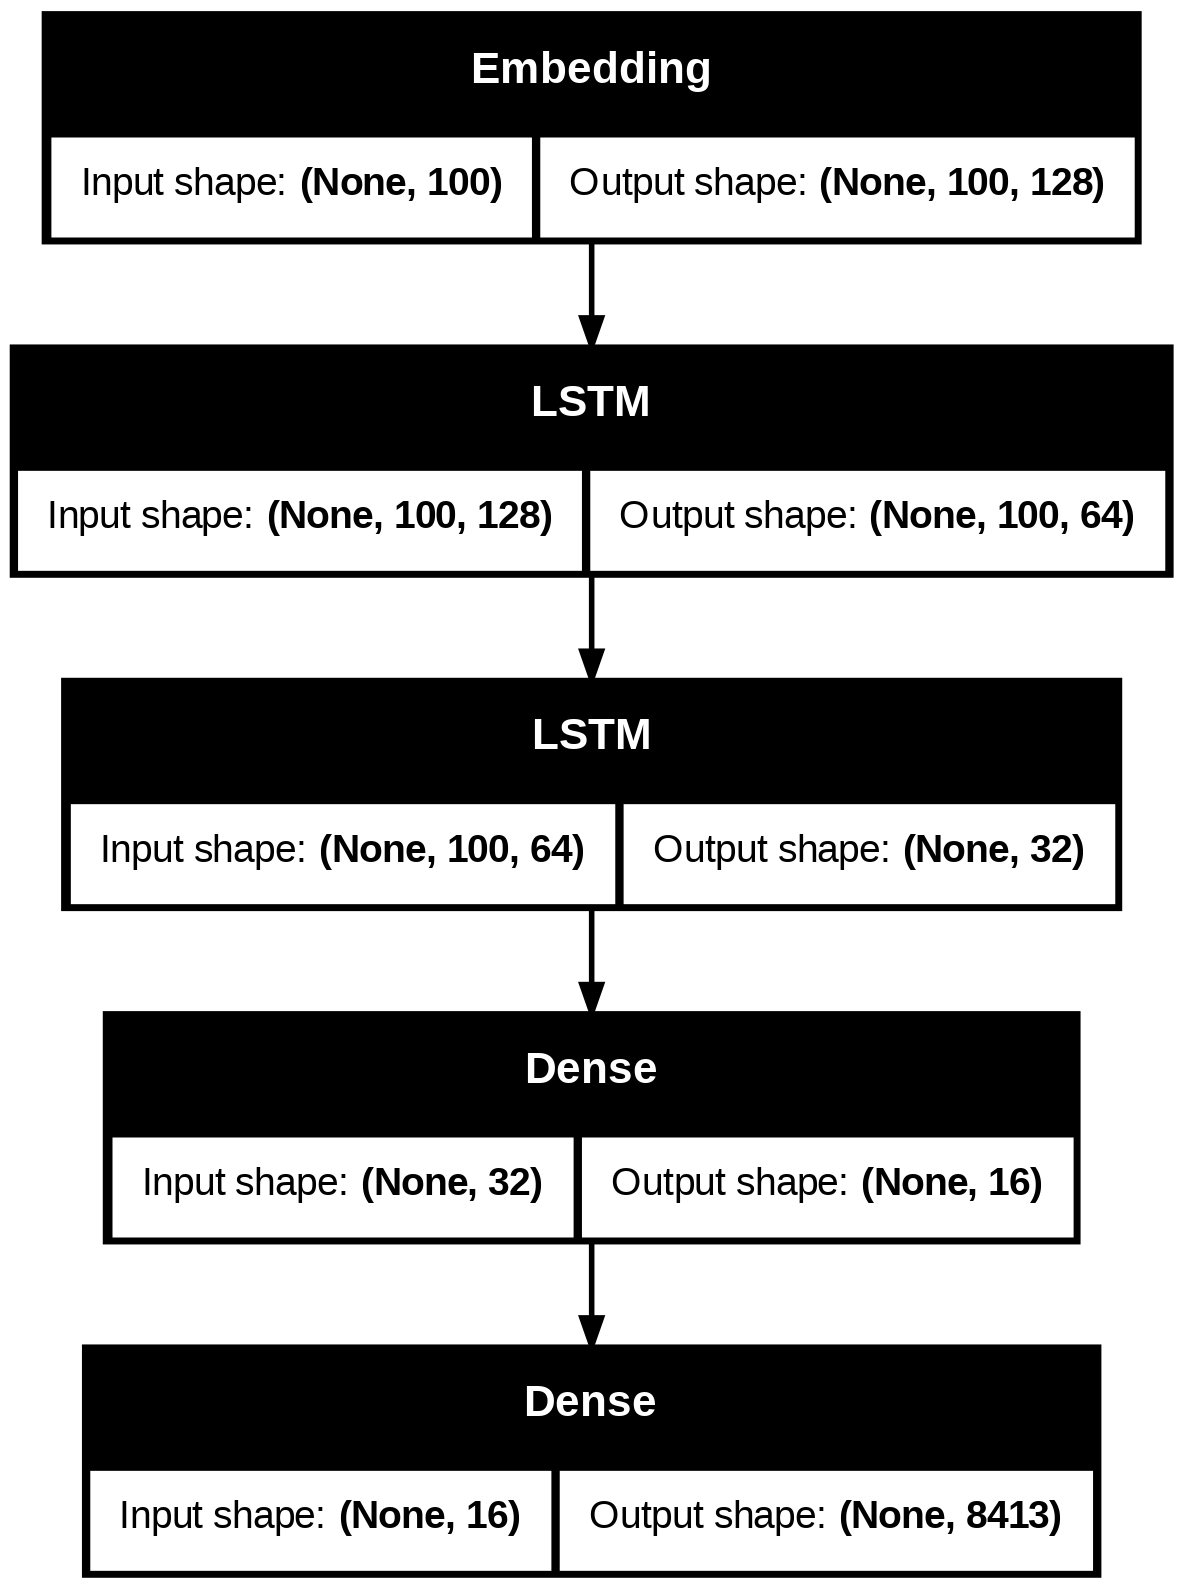

In [15]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Train the model

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    "next_word.h5",
    monitor='loss',
    verbose=1,  # Corrected typo: 'verbise' -> 'verbose'
    save_best_only=True
)

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001)
)

# Train the model
model.fit(
    X,
    y,
    epochs=20,
    batch_size=64,
    callbacks=[checkpoint]
)

Epoch 1/20
1122/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3150
Epoch 1: loss improved from inf to 6.98692, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 7.3135
Epoch 2/20
1124/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6405
Epoch 2: loss improved from 6.98692 to 6.62164, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.6405
Epoch 3/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4860
Epoch 3: loss improved from 6.62164 to 6.45377, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.4860
Epoch 4/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2571
Epoch 4: loss improved from 6.45377 to 6.24808, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.2571
Epoch 5/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0705
Epoch 5: loss improved from 6.24808 to 6.05374, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.0705
Epoch 6/20
1122/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8754
Epoch 6: loss improved from 6.05374 to 5.89035, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.8755
Epoch 7/20
1122/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7276
Epoch 7: loss improved from 5.89035 to 5.73363, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.7277
Epoch 8/20
1124/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5637
Epoch 8: loss improved from 5.73363 to 5.58345, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.5638
Epoch 9/20
1119/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4326
Epoch 9: loss improved from 5.58345 to 5.44838, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 5.4327
Epoch 10/20
1123/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3056
Epoch 10: loss improved from 5.44838 to 5.32587, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.3057
Epoch 11/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1906
Epoch 11: loss improved from 5.32587 to 5.21140, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 5.1906
Epoch 12/20
1121/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0750
Epoch 12: loss improved from 5.21140 to 5.10528, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 5.0751
Epoch 13/20
1125/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9699
Epoch 13: loss improved from 5.10528 to 5.00250, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 4.9700
Epoch 14/20
1122/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8642
Epoch 14: loss improved from 5.00250 to 4.90520, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 4.8644
Epoch 15/20
1123/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7943
Epoch 15: loss improved from 4.90520 to 4.81352, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.7944
Epoch 16/20
1121/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6899
Epoch 16: loss improved from 4.81352 to 4.72511, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 4.6901
Epoch 17/20
1125/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5927
Epoch 17: loss improved from 4.72511 to 4.64244, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.5928
Epoch 18/20
1120/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5192
Epoch 18: loss improved from 4.64244 to 4.56038, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 4.5195
Epoch 19/20
1122/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4446
Epoch 19: loss improved from 4.56038 to 4.48581, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 4.4448
Epoch 20/20
1120/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3915
Epoch 20: loss improved from 4.48581 to 4.41173, saving model to next_word.h5


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.3917


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_word.h5", monitor='loss', verbise=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint])

Lets Predict

In [18]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#Load the model and tokenizer
model = load_model('next_word.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predict_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line:")

  if text == "0":
    print("Execution completed....")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-3:]
      print(text)

      Predict_Next_Words(model, tokenizer, text)


    except Exception as e:
       print("Error occured: ",e)
       continue

Enter your line:The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
tm
Enter your line:absent-minded old
['absent-minded', 'old']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
project
Enter your line:Dr. Trent was a
['Trent', 'was', 'a']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
little
